In [1]:
import xarray
import numpy
import matplotlib.pyplot as plt

In [8]:
modis_wv_tif = '/disk2/Data/MOD05_L2_GeoTiff/MOD05_L2.A2019001.0100.061.day1_mod05.tif'

In [11]:
modis_wv_ds = xarray.open_rasterio(modis_wv_tif)
modis_wv_dn = numpy.array(modis_wv_ds[0])
modis_wv_v = modis_wv_dn*0.001+0.0 # DN -> ture value

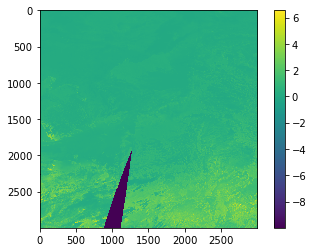

In [12]:
modis_wv_v[modis_wv_dn==-99999] = numpy.NaN
plt.imshow(modis_wv_v, interpolation='None')
plt.colorbar()